In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pymc3
import scipy.stats as stats

plt.style.use("ggplot")

logp = -10.252, ||grad|| = 15: 100%|██████████| 7/7 [00:00<00:00, 30.89it/s]   
Multiprocess sampling (2 chains in 2 jobs)
Metropolis: [theta]
Sampling 2 chains, 0 divergences: 100%|██████████| 201000/201000 [01:50<00:00, 1826.62draws/s]
The number of effective samples is smaller than 25% for some parameters.
/Users/stanfordbrown/PycharmProjects/untitled14/venv/lib/python3.7/site-packages/ipykernel_launcher.py:40: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
/Users/stanfordbrown/PycharmProjects/untitled14/venv/lib/python3.7/site-packages/arviz/plots/backends/matplotlib/distplot.py:38: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  "Argument backend_kwargs has not effect in matplotlib.plot_dist"


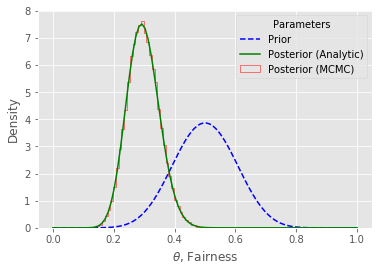

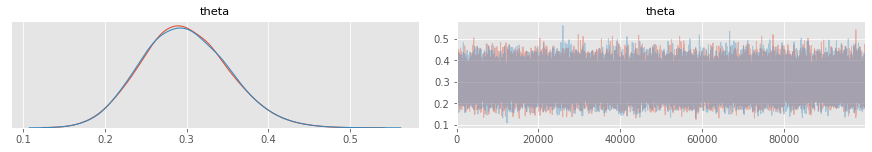

In [3]:
# parameter values for prior and analytic posterior
n = 50 
z = 10
alpha = 12
beta = 12
alpha_post = 22
beta_post = 52

# How many iterations of the Metropolis
# algorithm to carry out for MCMC
iterations = 100000

# Use PyMC3 to construct a model context
basic_model = pymc3.Model()
with basic_model:
    # Define our prior belief about the fairness
    # of the coin using a Beta distribution
    theta = pymc3.Beta("theta", alpha=alpha, beta=beta)
    
    # Define the Bernoulli likelihood function
    y = pymc3.Binomial("y", n=n, p=theta, observed=z)
    
    # Carry out the MCMC analysis using the Metropolis algorithm
    # Use Maximum A Posteriori (MAP) optimisation as initial value for MCMC
    start = pymc3.find_MAP()
    
    # Use the Metropolis algorithm (as opposed to NUTS or HMC, etc.)
    step = pymc3.Metropolis()
    
    # Calculate the trace
    trace = pymc3.sample(
        iterations, step, start, random_seed=1, progressbar=True
    )
    
# Plot the posterior histogram from MCMC analysis
bins=50
plt.hist(
    trace["theta"], bins, 
    histtype="step", normed=True,
    label="Posterior (MCMC)", color="red"
)

# Plot the analytic prior and posterior beta distributions
x = np.linspace(0, 1, 100)
plt.plot(
    x, stats.beta.pdf(x, alpha, beta),
    "--", label="Prior", color="blue"
)
plt.plot(
    x, stats.beta.pdf(x, alpha_post, beta_post),
    label='Posterior (Analytic)', color="green"
)

# Update the graph labels
plt.legend(title="Parameters", loc="best")
plt.xlabel("$\\theta$, Fairness")
plt.ylabel("Density")
plt.show()

# Show the trace plot
pymc3.traceplot(trace)
plt.show()